In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
from tqdm import tqdm
from datetime import datetime

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
def plot_feature(data, feature_name, point):
    print(data)
    data = data[point_lst == [point]]
    
    plt.figure(figsize=(15,5))
    plt.plot(data, xlabel='Data')
    plt.show()

In [4]:
def calculate_publications_num(data):
    """Calculate the number of publications at each 
    point and at each point for each hour."""
    num_timestamp = pd.DataFrame(data.groupby(by=["point", "timestamp"])["lat"].count()).rename(columns={"lat": "sum"})
    num_point = pd.DataFrame(data.groupby(by=["point"])["lat"].count()).rename(columns={"lat": "sum"})
    
    return num_timestamp, num_point

In [5]:
def sort_df(df, feature_name):
    return df.sort_values(by=[feature_name], ascending=False)

In [6]:
def define_pop_unpop(df_nums, df, n_top):
    """Define first n_top popular and unpopular places.
    
    Parameters
    ---------
    df_nums: pandas.DataFrame
        Dataframe with the number of publications for all time at each point of the cube
    df: pandas.DataFrame
        Initial dataframe
    """
    
    # Find the most popular and unpopular places
    publications_num_point = sort_df(df_nums, "sum")
    
    pop_places = []
    pop_places_num = []
    unpop_places = []
    unpop_places_num = []
    
    # The most popular n_top places
    for i in range(n_top):
        pop_places_num.append(df_nums.iloc[i]["sum"])
        point_pop = publications_num_point.index[i]
        lat_pop, lon_pop = df[["lat", "lon"]][df["point"] == point_pop].iloc[0]
        pop_places.append((lat_pop, lon_pop))
        
    # The most unpopular n_top place
    for i in range(n_top):
        unpop_places_num.append(df_nums.iloc[-i-1]["sum"])
        point_unpop = publications_num_point.index[-i-1]
        lat_unpop, lon_unpop = df[["lat", "lon"]][df["point"] == point_unpop].iloc[0]
        unpop_places.append((lat_unpop, lon_unpop))
    
    
    def print_res(coord_lst, values_lst):
        i = 1
        for lat_lon, num_pub in zip(coord_lst, values_lst):
            print(f"{i}: {lat_lon} number of publications: {num_pub}")
            i += 1
    
    print("The most popular places (lat, lon):")
    print_res(pop_places, pop_places_num)
    print("The most unpopular place (lat, lon):")
    print_res(unpop_places, unpop_places_num)

In [7]:
path = './Data/'

train_data = pd.read_csv(path + 'train_data.csv', ',', header=0, parse_dates=['timestamp'], encoding='cp1251')

train_data.head(10)

,timestamp,lon,lat,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point
0,1565607600,30.329370,59.940488,63,4,52,6,0,0,0,0,0101000020E6100000DBC1F19351543E4006FC5DE561F8...
1,1565568000,30.342845,59.869542,44,0,40,0,4,0,0,0,0101000020E6100000544263A8C4573E40C27FCF284DEF...
2,1565568000,30.322632,60.039332,30,0,77,7,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...
3,1565568000,30.322632,59.938238,13,0,634,17,32,0,0,7,0101000020E61000009E01B90998523E40CEB8CE2B18F8...
4,1565568000,30.309158,59.932612,8,0,0,0,0,0,0,0,0101000020E6100000268147F5244F3E40494A4ED65FF7...
5,1565568000,30.495558,59.859395,80,0,17,0,0,1,0,0,0101000020E61000000C9D69E5DC7E3E404EFE0BA600EE...
6,1565568000,30.219326,59.973094,123,0,2,0,0,0,0,2,0101000020E610000050D352C225383E4030E11C588EFC...
7,1565568000,30.315895,59.941612,15,0,29,4,0,0,0,1,0101000020E61000006141807FDE503E406DAFAAC186F8...
8,1565568000,30.322632,60.039332,213,0,126,14,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...
9,1565568000,30.241784,59.924735,106,6,253,25,1,0,0,0,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...


In [8]:
print(train_data.info(verbose=True))
# Counting NaN values in all columns
print(train_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526526 entries, 0 to 8526525
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      object 
 1   lon            float64
 2   lat            float64
 3   likescount     int64  
 4   commentscount  int64  
 5   symbols_cnt    int64  
 6   words_cnt      int64  
 7   hashtags_cnt   int64  
 8   mentions_cnt   int64  
 9   links_cnt      int64  
 10  emoji_cnt      int64  
 11  point          object 
dtypes: float64(2), int64(8), object(2)
memory usage: 780.6+ MB
None
timestamp        0
lon              0
lat              0
likescount       0
commentscount    0
symbols_cnt      0
words_cnt        0
hashtags_cnt     0
mentions_cnt     0
links_cnt        0
emoji_cnt        0
point            0
dtype: int64


In [9]:
train_data.head(10)

,timestamp,lon,lat,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point
0,1565607600,30.329370,59.940488,63,4,52,6,0,0,0,0,0101000020E6100000DBC1F19351543E4006FC5DE561F8...
1,1565568000,30.342845,59.869542,44,0,40,0,4,0,0,0,0101000020E6100000544263A8C4573E40C27FCF284DEF...
2,1565568000,30.322632,60.039332,30,0,77,7,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...
3,1565568000,30.322632,59.938238,13,0,634,17,32,0,0,7,0101000020E61000009E01B90998523E40CEB8CE2B18F8...
4,1565568000,30.309158,59.932612,8,0,0,0,0,0,0,0,0101000020E6100000268147F5244F3E40494A4ED65FF7...
5,1565568000,30.495558,59.859395,80,0,17,0,0,1,0,0,0101000020E61000000C9D69E5DC7E3E404EFE0BA600EE...
6,1565568000,30.219326,59.973094,123,0,2,0,0,0,0,2,0101000020E610000050D352C225383E4030E11C588EFC...
7,1565568000,30.315895,59.941612,15,0,29,4,0,0,0,1,0101000020E61000006141807FDE503E406DAFAAC186F8...
8,1565568000,30.322632,60.039332,213,0,126,14,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...
9,1565568000,30.241784,59.924735,106,6,253,25,1,0,0,0,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...


In [10]:
publications_num_timestamp, publications_num_point = calculate_publications_num(train_data)

In [11]:
# Find the most popular and unpopular places
define_pop_unpop(publications_num_point, train_data, 5)

The most popular places (lat, lon):
1: (59.933737378893916, 30.306911897982353) number of publications: 74415
2: (59.92473501631175, 30.24178403988369) number of publications: 41
3: (59.93936261503522, 30.31364926261325) number of publications: 9
4: (59.94948563587889, 30.300174533351456) number of publications: 226
5: (59.950610225183794, 30.315895050823546) number of publications: 61
The most unpopular place (lat, lon):
1: (59.894334002612496, 30.52250756617104) number of publications: 1
2: (59.977588924099706, 30.52026177796074) number of publications: 2
3: (59.8695422185115, 30.31364926261325) number of publications: 11
4: (59.96410232102935, 30.31364926261325) number of publications: 1
5: (60.02699283235407, 30.31364926261325) number of publications: 97


### Unpopular places analysis

In [12]:
publications_num_point

,sum
point,
0101000020E610000000000000000000000000000000000000,74415
0101000020E610000002A5EC7AB31D3E4097654065F8EA4D40,41
0101000020E610000002BF48199F3F3E400A41C338F1F64D40,9
0101000020E610000002BF48199F3F3E400A721DB144FC4D40,226
0101000020E610000002BF48199F3F3E400B9A5B3306034E40,61
...,...
0101000020E6100000FF9D4C0EC3853E406E4CE6811AEA4D40,97
0101000020E6100000FF9D4C0EC3853E408481D0E8E0EF4D40,1
0101000020E6100000FF9D4C0EC3853E4094782B2D0DF34D40,11


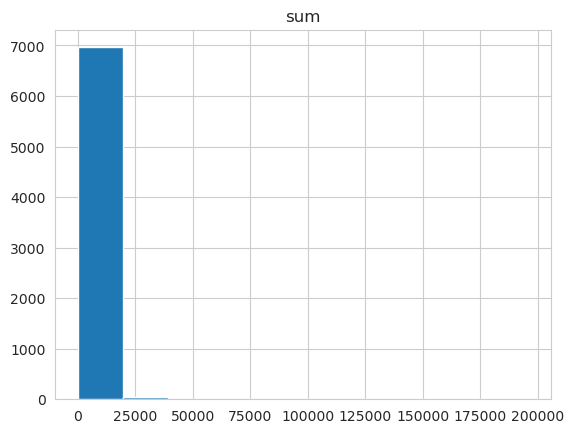

In [13]:
publications_hist = publications_num_point.hist()

In [14]:
unpopular_places = publications_num_point[publications_num_point["sum"] == 1].index
unpopular_places = [train_data[train_data["point"] == point] for point in unpopular_places]

In [15]:
unpopular_places_df = pd.concat(unpopular_places, axis=0)
unpopular_places_df

,timestamp,lon,lat,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point
2334809,1565078400,30.248521,59.883067,56,6,394,26,10,0,0,0,0101000020E610000002BF48199F3F3E4014A96F5908F1...
6542611,1559041200,30.381023,59.974218,18,0,0,0,0,0,0,0,0101000020E610000003D9A4B78A613E4028BF212BB3FC...
208956,1572357600,30.513524,59.984330,15,0,12,2,0,0,0,0,0101000020E610000003F3005676833E400262E887FEFD...
407102,1576134000,30.513524,59.974218,33,1,233,21,0,1,0,0,0101000020E610000003F3005676833E4028BF212BB3FC...
4546548,1573974000,30.513524,59.976465,9,0,330,14,13,0,0,6,0101000020E610000003F3005676833E4041CA35D0FCFC...
...,...,...,...,...,...,...,...,...,...,...,...,...
4093911,1573851600,30.257505,59.953984,149,7,275,16,8,0,0,1,0101000020E6100000FE6994D1EB413E408F05D6231CFA...
7260294,1577660400,30.257505,60.007914,22,0,2098,197,6,0,0,10,0101000020E6100000FE6994D1EB413E40CDB8F9500301...
5636306,1570521600,30.390006,59.840219,75,6,24,1,2,0,0,3,0101000020E6100000FF83F06FD7633E40219CBC4B8CEB...
1052022,1553803200,30.522508,59.874051,20,0,474,44,9,0,0,9,0101000020E6100000FF9D4C0EC3853E408481D0E8E0EF...


In [16]:
time_lst = [datetime.fromtimestamp(int(unpopular_places_df.loc[i]["timestamp"])).strftime("%H:%M:%S") 
            for i in unpopular_places_df.index]
date_lst = [datetime.fromtimestamp(int(unpopular_places_df.loc[i]["timestamp"])).date()
            for i in unpopular_places_df.index]

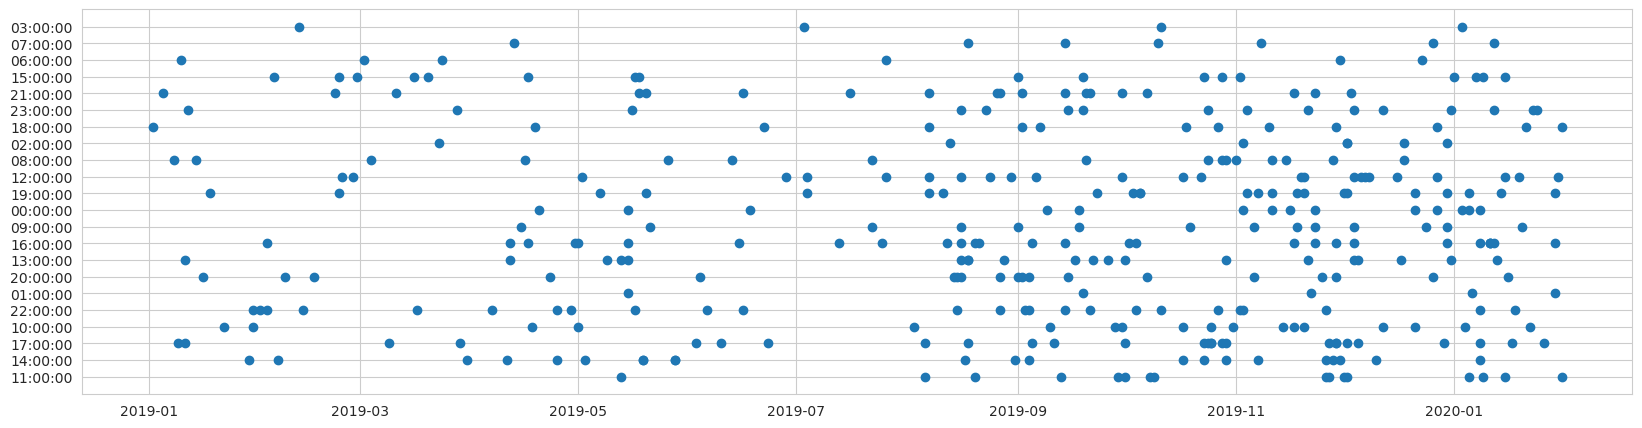

In [17]:
plt.figure(figsize=(20,5))
plt.scatter(date_lst, time_lst)